<h1>Simulated Annealing</h1>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def objective(x):
    return - 20*np.exp(-0.2*np.sqrt(0.5*x**2)) - np.exp(0.5*(np.cos(2*np.pi*x)+1))+ np.e + 20

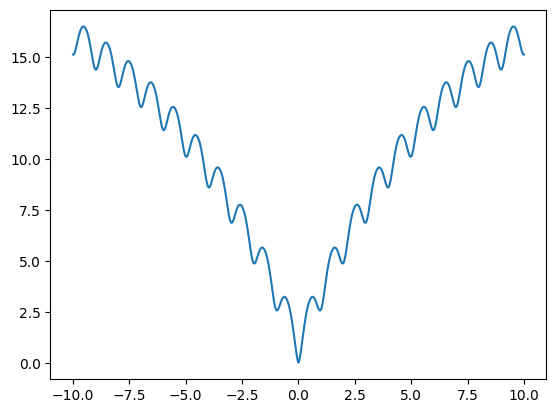

In [11]:
xx = np.linspace(-10,10,1000)
plt.plot(xx,objective(xx) )
plt.show()

In [12]:
def move(x):
    return np.random.normal(x,2)

Let's define an acceptance function for our proposal move as:

$P(E,E_{new}) = \begin{cases} 1 \hspace{3.4cm} E_{new} < E \\
\exp \left(-\frac{E-E_{new}}{kT}\right) \hspace{1cm} E_{new} > E 
\end{cases}$

In [13]:
def P(e,enew,t):
    
    if(enew < e):
        return 1
    else:
        return np.exp(-(enew-e)/t)

Let's run the minimization different times choosing the starting point at random each time:

In [14]:
xmin = []

for j in tqdm(range(1000)):
    
    # Initial Point chosen at random
    s0 = np.random.uniform(-5,5)

    # Number of iteration
    kmax = 5000
    # Defining temperature profile
    Tmin = 0.01
    Tmax = 1
    l=1e-3
    T = [Tmax*np.exp(-l*x)+Tmin for x in range(1,kmax)]

    # Setting initial state
    s = s0

    shistory = []

    for t in T:

        # Test a new point in space
        
        snew = move(s)
        # Pick Random Number between [0,1]
        u = np.random.uniform(0,1)
        # Compute acceptance probability according to Metropolis-Hasting Algorithm
        p = P(objective(s),objective(snew),t)

        # Compute P(E,Enew,T)
        if p > u:
            s = snew

        shistory.append(s)

    x = np.linspace(-10,10,1000)
    E = objective(x)
    xmin.append(s)

100%|██████████| 1000/1000 [01:35<00:00, 10.44it/s]


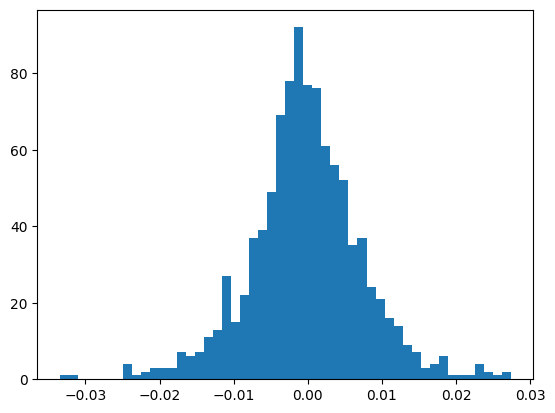

In [10]:
plt.hist(xmin, bins=50)
plt.show()

Let's visualize some plots:

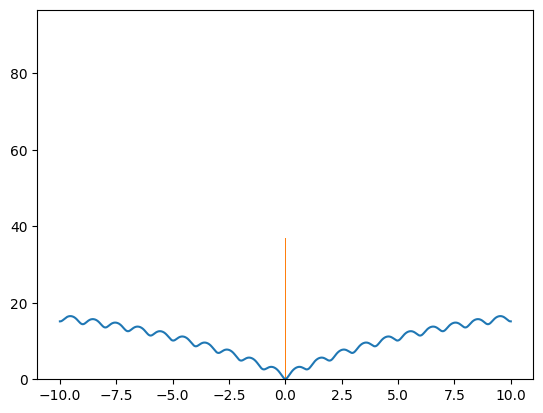

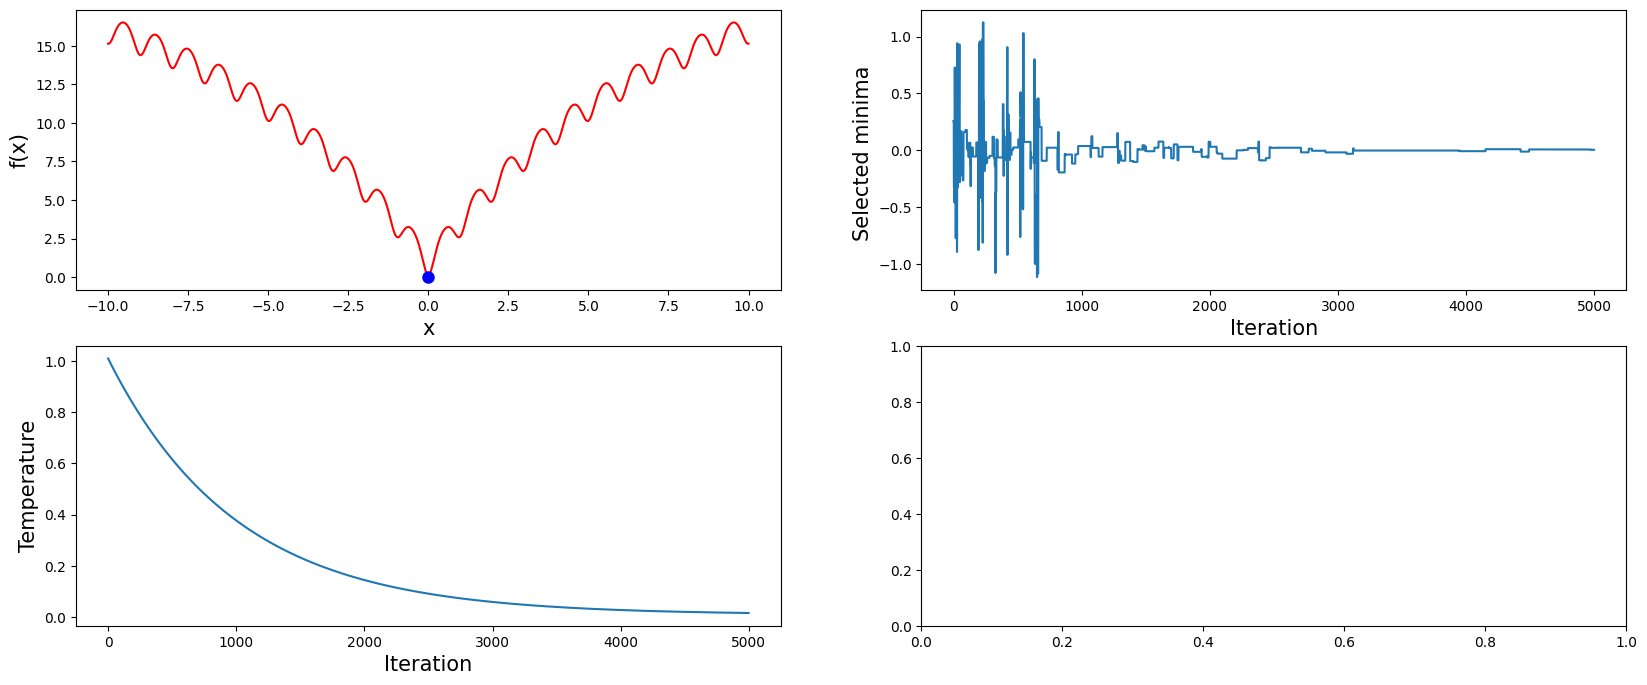

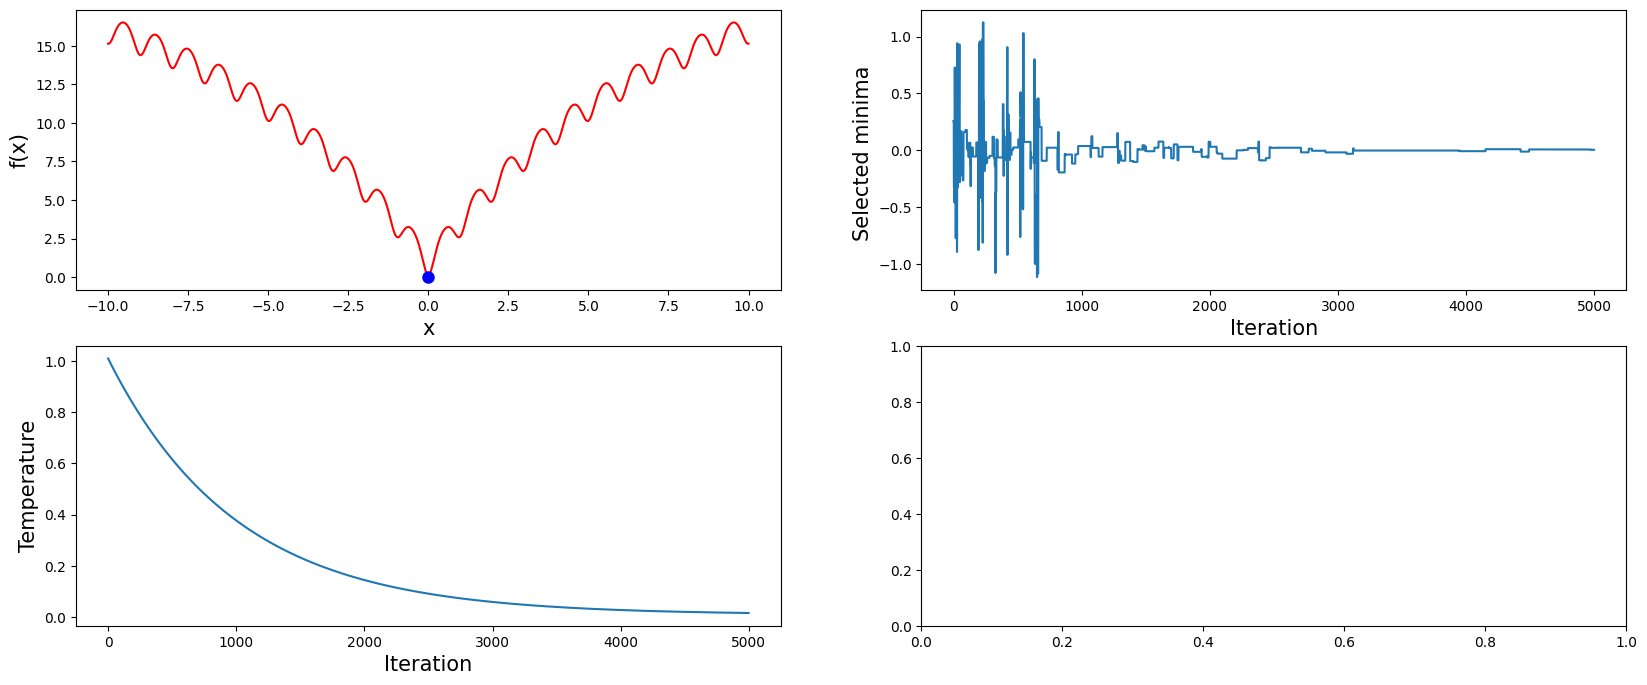

In [9]:
    f,ax = plt.subplots(2,2,figsize=(20,8))

    ax[0,0].set_xlabel('x', fontsize=15)
    ax[0,0].set_ylabel('f(x)', fontsize=15)
    ax[0,0].plot(x,E,'r-')
    ax[0,0].plot(s,objective(s),marker='o', color='blue',ms=8)

    ax[0,1].set_xlabel('Iteration', fontsize=15)
    ax[0,1].set_ylabel('Selected minima ', fontsize=15)

    ax[1,0].set_xlabel('Iteration', fontsize=15)
    ax[1,0].set_ylabel('Temperature', fontsize=15)
    ax[0,1].plot(shistory)
    ax[1,0].plot(T)
    plt.show()